<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/Generative-Models/blob/main/Pretrained_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image

# Load the pre-trained BigGAN model from TensorFlow Hub
module_path = "https://tfhub.dev/deepmind/biggan-deep-128/1"  # This is a BigGAN model
bigan = hub.KerasLayer(module_path)

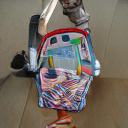

In [34]:
def generate_image(latent_dim=128, class_dim=1000, truncation=0.5):
    # Generate a random latent vector and class vector
    latent_vector = np.random.randn(1, latent_dim)
    class_vector = np.random.randn(1, class_dim)

    # Apply truncation trick
    latent_vector = truncation * latent_vector / np.linalg.norm(latent_vector)
    class_vector = truncation * class_vector / np.linalg.norm(class_vector)

    # Generate the image
    inputs = {"z": latent_vector, "y": class_vector, "truncation": truncation}
    image = bigan(inputs)

    # Convert the image to a PIL Image
    image = (image.numpy().squeeze() * 127.5 + 127.5).astype(np.uint8)
    image = PIL.Image.fromarray(image)

    return image

# Generate and save an image
generated_image = generate_image()
generated_image.save("biggan_generated_image.png")
generated_image

In [37]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image

# Load the pre-trained GAN model from TensorFlow Hub
module_path = "https://tfhub.dev/google/progan-128/1"  # This is a Progressive GAN model trained on CelebA dataset
progan = hub.KerasLayer(module_path)


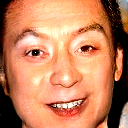

In [41]:
# Function to generate an image from a random latent vector
def generate_image(latent_dim=512):
    # Generate a random latent vector
    latent_vector = np.random.randn(1, latent_dim)

    # Generate the image
    image = progan(latent_vector)

    # Convert the image to a PIL Image
    image = (image.numpy().squeeze() * 255).astype(np.uint8)
    image = PIL.Image.fromarray(image)

    return image

# Generate and save an image
generated_image = generate_image()
generated_image.save("generated_image.png")
generated_image